In [1]:
#Supoort Vector Machines

In [2]:
#iris flower data sets


In [259]:
from IPython.display import Image

In [260]:
url = 'http://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg'

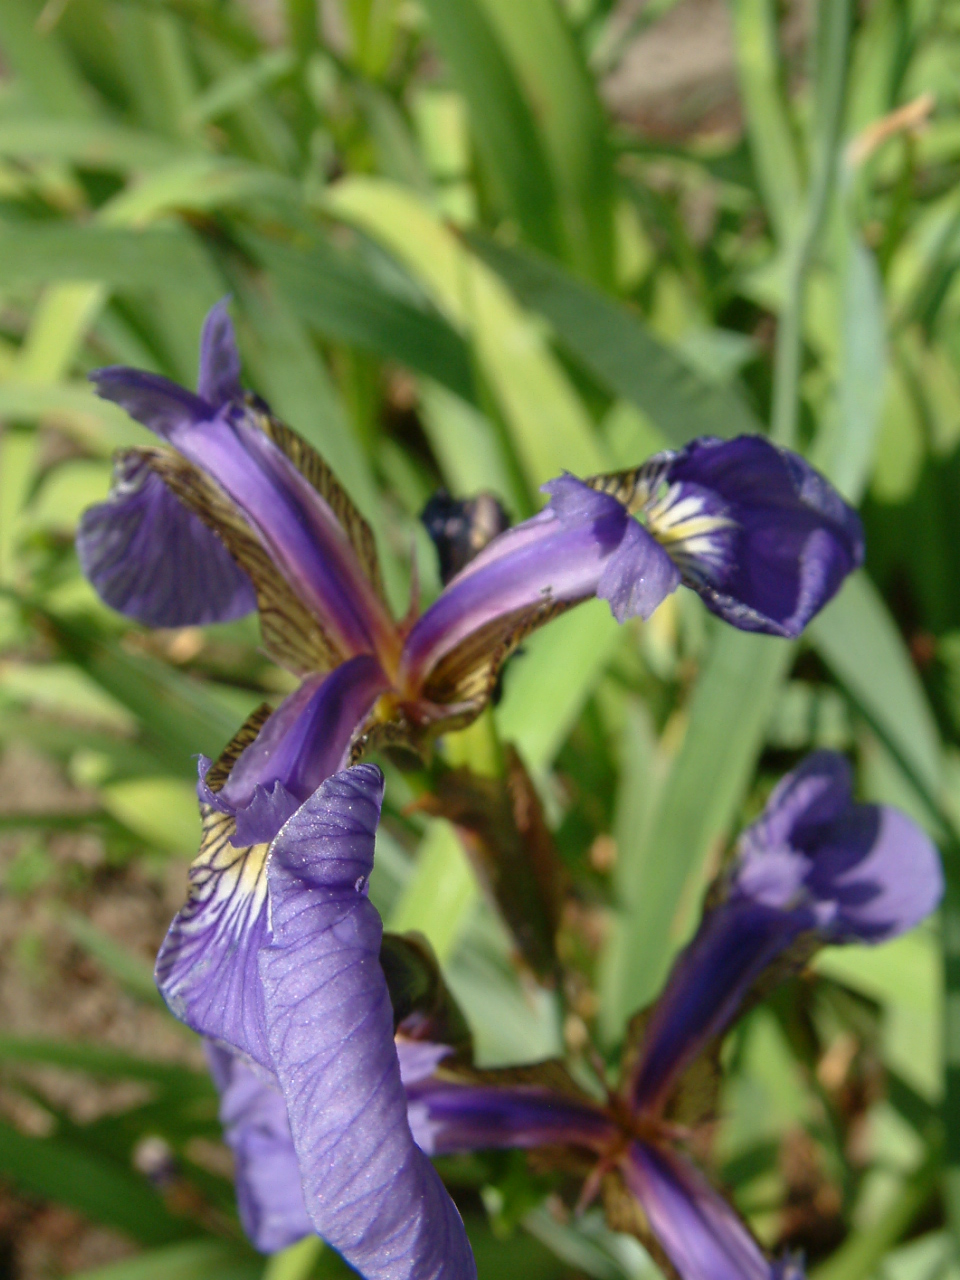

In [261]:
Image(url,width=300, height=100) #image of iris_setosa

In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [263]:
data=sns.load_dataset('iris')

In [264]:
data.info()  #basically it has four coloumns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [265]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


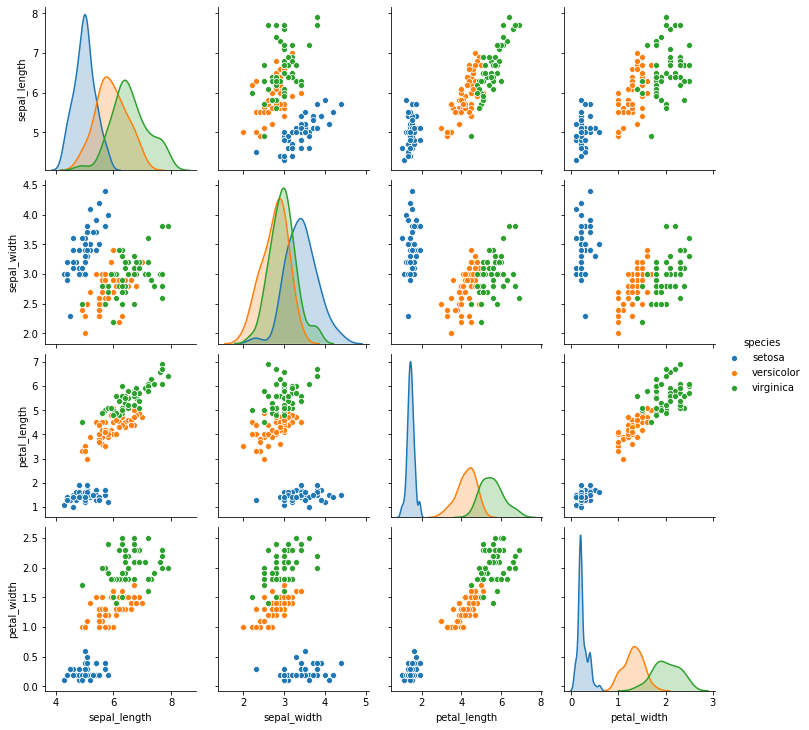

In [266]:
sns.pairplot(data,hue='species') # we can observe the similarities between some of the points

In [267]:
a=data[['sepal_length','sepal_width','species']]

In [268]:
a=a[a['species']=='setosa']

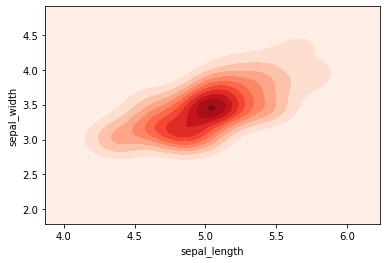

In [269]:
 sns.kdeplot(a['sepal_length'],a['sepal_width'],cmap="Reds",shade=True) #kde plot for setosa

In [270]:
from sklearn.model_selection import train_test_split

In [271]:
 X_train, X_test, y_train, y_test=train_test_split(data[['sepal_length','sepal_width','petal_length','petal_width']],data['species'])

In [272]:
from sklearn.svm import SVC

In [273]:
model=SVC()


In [274]:
model.fit(X_train,y_train)  # we have to adjust the values of c and gamma later on so that we can increase the accuracy

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [275]:
pred=model.predict(X_test)

In [276]:
from sklearn.metrics import confusion_matrix

In [292]:
conf1=confusion_matrix(pred,y_test)
print(confusion_matrix(pred,y_test)) #prediction is different everytime

[[16  0  0]
 [ 0 10  0]
 [ 0  1 11]]


In [293]:
from sklearn.metrics import classification_report

In [294]:
print(classification_report(pred,y_test)) # we have such poor results

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [295]:
from sklearn.model_selection import GridSearchCV

In [296]:
 Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}

In [297]:
grid=GridSearchCV(SVC(),param_grid,verbose=2)

In [298]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.001, gamma=0.001 ............................................
[CV] ............................. C=0.001, gamma=0.001, total=   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ............................. C=0.001, gamma=0.001, total=   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ............................. C=0.001, gamma=0.001, total=   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ............................. C=0.001, gamma=0.001, total=   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ............................. C=0.001, gamma=0.001, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] .............................. C=0.001, gamma=0.01, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................................. C=0.01, gamma=1, total=   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] .................................. C=0.01, gamma=1, total=   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] .................................. C=0.01, gamma=1, total=   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] .................................. C=0.01, gamma=1, total=   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] .................................. C=0.01, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [299]:
grid_pred=grid.predict(X_test)

In [300]:
grid.best_params_

{'C': 1, 'gamma': 1}

In [301]:
print(classification_report(grid_pred,y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.82      1.00      0.90         9
   virginica       1.00      0.85      0.92        13

    accuracy                           0.95        38
   macro avg       0.94      0.95      0.94        38
weighted avg       0.96      0.95      0.95        38



In [288]:
grid.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [304]:
conf2=confusion_matrix(grid_pred,y_test)
conf2

array([[16,  0,  0],
       [ 0,  9,  0],
       [ 0,  2, 11]])

In [305]:
conf1   #BEFORE GRID SEARCH

array([[16,  0,  0],
       [ 0, 10,  0],
       [ 0,  1, 11]])